In [3]:
import pickle as cPickle
import numpy as np
from scipy.io.wavfile import read
from sklearn.mixture import GMM 
from featureextraction import extract_features
#from speakerfeatures import extract_features
import warnings
warnings.filterwarnings("ignore")
import os
import time



In [4]:
source      = "/Users/jm186072/Documents/DataScience/Speaker-Identification-Python/trng_data/"  
test_data_folder   = "/Users/jm186072/Documents/DataScience/Speaker-Identification-Python/test_data/"  
dest        = "/Users/jm186072/Documents/DataScience/Speaker-Identification-Python/models/"

#train_file  = "/Users/jm186072/Documents/DataScience/Speaker-Identification-Python/trngdata.txt"


In [31]:
#file_paths = open(train_file,'r')


In [31]:
features = np.asarray(())

for dirs in os.listdir(source):
    if dirs == '.DS_Store':
        continue
    #print(dirs)
    dirpath = source+dirs
    #print(dirpath)
    count=0
    for audiofiles in os.listdir(dirpath+'/wav'):

        if audiofiles == '.DS_Store':
            continue
        
        count = count + 1
        #print(count,audiofiles)
        
        
        sr,audio = read(dirpath+'/wav'+'/'+audiofiles)

        # extract 40 dimensional MFCC & delta MFCC features
        vector   = extract_features(audio,sr)
        
        if features.size == 0:
            features = vector
        else:
            features = np.vstack((features, vector))
        #print(audiofiles)
        #print(features.shape)
        if count ==5:
            
            #print("Creating GMM ")
            gmm = GMM(n_components = 16, n_iter = 200, covariance_type='diag',n_init = 3)
            gmm.fit(features)
            #print(type(features))
            #print(features.shape)
            # dumping the trained gaussian model
            
            picklefile = str(dest.strip()+dirs.strip()+ ".gmm")
            #print(picklefile)
            cPickle.dump(gmm,open(picklefile,'wb'))
            
            print ('speaker:->',dirs,"Data points = ",features.shape)

            count=0
            features = np.asarray(())
            break
            
        
        
    

speaker:-> calamity-20071011-poe Data points =  (2711, 40)
speaker:-> chocoholic-20070524 Data points =  (2443, 40)
speaker:-> chocoholic-20070612-eti33 Data points =  (2775, 40)
speaker:-> chocoholic-20080420-pos Data points =  (3499, 40)
speaker:-> cloudmountain-20080420-eti Data points =  (1910, 40)
speaker:-> cloudmountain-20080420-yos Data points =  (4613, 40)
speaker:-> crhylove-10252006 Data points =  (2437, 40)
speaker:-> delibab-20071007-poe Data points =  (2809, 40)
speaker:-> delibab-20071012 Data points =  (3150, 40)
speaker:-> delibab-20071019-poe Data points =  (3202, 40)
speaker:-> delibab-20071020 Data points =  (3442, 40)
speaker:-> delibab-20071025-poe Data points =  (3915, 40)
speaker:-> ductapeguy-20070308b Data points =  (1323, 40)
speaker:-> ductapeguy-20070619-com Data points =  (3007, 40)
speaker:-> ductapeguy-20080423-pri Data points =  (3227, 40)
speaker:-> ductapeguy-20080423-sto Data points =  (3906, 40)
speaker:-> gesine-20080421-rid Data points =  (4184, 4

In [5]:
modelpath = "/Users/jm186072/Documents/DataScience/Speaker-Identification-Python/models/"

gmm_files = [os.path.join(modelpath,fname) for fname in 
              os.listdir(modelpath) if fname.endswith('.gmm')]
#print(gmm_files,len(gmm_files))

In [7]:
models    = [cPickle.load(open(fname,'rb')) for fname in gmm_files]

spk_list   = [fname.split("/")[-1].split(".gmm")[0] for fname in gmm_files]

#print(spk_list)

In [9]:
# Code for Identifying an audio 
test_dir = r'/Users/jm186072/Documents/DataScience/Speaker-Identification-Python/test1/'
total_sample = 0
for test_audio_file in os.listdir(test_dir):
    
    if test_audio_file == '.DS_Store':
        continue
    
    total_sample += 1.0
    
    sr,audio = read(test_dir+test_audio_file)
    vector = extract_features(audio,sr)
    log_likelihood = np.zeros(len(models))
    #print(log_likelihood)
    for i in range(len(models)):
        gmm    = models[i]  #checking with each model one by one
        scores = np.array(gmm.score(vector))
        log_likelihood[i] = scores.sum()
        #print(scores.sum())
    #print(log_likelihood)
    winner = np.argmax(log_likelihood)
    
    print (test_audio_file,"is detected as - ", spk_list[winner])  


per0131.wav is detected as -  kayray-20070425-per04


In [35]:

def identify_speakers(test_spk_root_folder):
    total_sample = 0
    error = 0
    for speakers in os.listdir(test_data_folder):
        if speakers == '.DS_Store':
            continue
        #print(speakers)
        for audio_file in os.listdir(test_data_folder+speakers+'/wav'):
            if audio_file == '.DS_Store':
                continue
            #print('\t',audio_file)
            total_sample += 1 
            sr,audio = read(test_data_folder+speakers+'/wav/'+audio_file)
            vector = extract_features(audio,sr)

            log_likelihood = np.zeros(len(models))


            for i in range(len(models)):
                gmm    = models[i]  #checking with each model one by one
                scores = np.array(gmm.score(vector))
                log_likelihood[i] = scores.sum()

            winner = np.argmax(log_likelihood)
            #print ("\tdetected as - ", speakers[winner])
            #print(winner)
            if spk_list[winner] != speakers:
                error += 1

    print ('Total Audio Files Processed = ',total_sample,'Incorrectly Identified = ' , error )
    print('Identification Accuracy -->',((total_sample - error) / total_sample) * 100)
    
 
    return(total_sample,error)



In [36]:
t,e = identify_speakers(test_data_folder)
print(t,e)

Total Audio Files Processed =  1362 Incorrectly Identified =  186
Identification Accuracy --> 86.34361233480176
1362 186


92 3220


In [12]:
def train_spk_model(trng_data_root_folder_path):
    
    for dirs in os.listdir(trng_data_root_folder_path):
        if dirs == '.DS_Store':
            continue
            #print(dirs)
        dirpath = trng_data_root_folder_path+dirs
        #print(dirpath)
        count=0
    
    for audiofiles in os.listdir(dirpath+'/wav'):

        if audiofiles == '.DS_Store':
            continue
        
        count = count + 1
        #print(count,audiofiles)
        
        
        sr,audio = read(dirpath+'/wav'+'/'+audiofiles)

        # extract 40 dimensional MFCC & delta MFCC features
        vector   = extract_features(audio,sr)
        
        if features.size == 0:
            features = vector
        else:
            features = np.vstack((features, vector))
        #print(audiofiles)
        #print(features.shape)
        if count ==5:
            
            #print("Creating GMM ")
            gmm = GMM(n_components = 16, n_iter = 200, covariance_type='diag',n_init = 3)
            gmm.fit(features)
            #print(type(features))
            #print(features.shape)
            # dumping the trained gaussian model
            
            picklefile = str(dest.strip()+dirs.strip()+ ".gmm")
            #print(picklefile)
            cPickle.dump(gmm,open(picklefile,'wb'))
            
            print ('speaker:->',dirs,"Data points = ",features.shape)

            count=0
            features = np.asarray(())
            break

    
    return(print('Successfully trained model'))
    

In [ ]:
# Miscellaneous

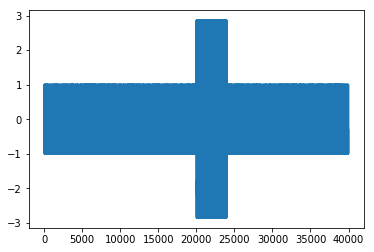

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

dt = 0.0005
t = np.arange(0.0, 20.0, dt)
s1 = np.sin(2*np.pi*100*t)
s2 = 2*np.sin(2*np.pi*400*t)

# create a transient "chirp"
mask = np.where(np.logical_and(t > 10, t < 12), 1.0, 0.0)
s2 = s2 * mask

# add some noise into the mix
nse = 0.01*np.random.random(size=len(t))

x = s1 + s2 + nse  # the signal

plt.plot(x)
plt.show()

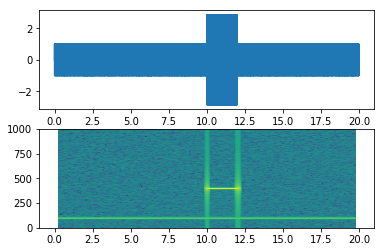

In [5]:
NFFT = 1024       # the length of the windowing segments
Fs = int(1.0/dt)  # the sampling frequency

# Pxx is the segments x freqs array of instantaneous power, freqs is
# the frequency vector, bins are the centers of the time bins in which
# the power is computed, and im is the matplotlib.image.AxesImage
# instance

ax1 = plt.subplot(211)
plt.plot(t, x)
plt.subplot(212, sharex=ax1)
Pxx, freqs, bins, im = plt.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
plt.show()

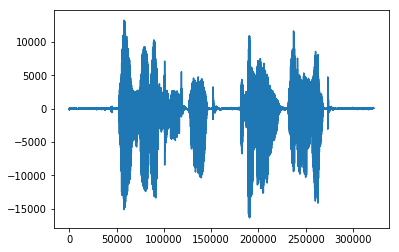

In [8]:
audio_file = '/Users/jm186072/Documents/DataScience/Speaker-Identification-Python/test1/as0010.wav'
sr,audio = read(audio_file)
plt.plot(audio)

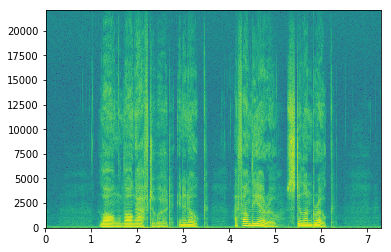

In [9]:
Pxx, freqs, bins, im = plt.specgram(audio, NFFT=1024, Fs=sr, noverlap=900)
plt.show()

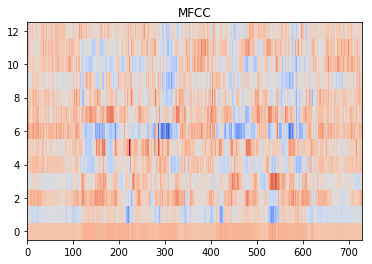

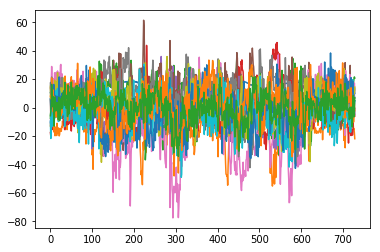

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import python_speech_features as mfcc

mfcc_feat = mfcc.mfcc(audio,sr)

ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_feat, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
ax.set_title('MFCC')
#Showing mfcc_data
plt.show()
#Showing mfcc_feat
plt.plot(mfcc_feat)
plt.show()